### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from tensorflow.keras.models import model_from_json
from pathlib import Path
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv

### class names

In [3]:
class_names = {
    0: 'Acne', 
    1: 'benign',
    2:'Dermatitis',
    3:'Eczema'
}

### model loading

In [4]:
file = Path("GaborVGG16_model/GaborVGG16_model_structure.json")
model_structure = file.read_text()
model = model_from_json(model_structure)
model.load_weights("GaborVGG16_model/GaborVGG16_model_weights.h5")

### user input

In [5]:
img = cv.imread("user_input/benign5.jpg",0) #reading image 

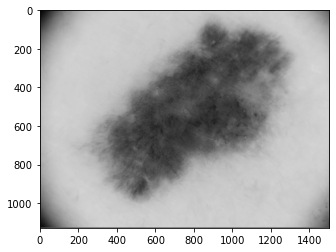

In [6]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

### applying gabor filter

In [7]:
gabor_1 = cv.getGaborKernel((18, 18), 1.5, np.pi/4, 5.0, 1.5, 0, ktype=cv.CV_32F) #initialising the parameters of gabor filter 
filtered_img_1 = cv.filter2D(img, cv.CV_8UC3, gabor_1) # applying gabor filter
cv.imwrite('user_input/test.jpg', filtered_img_1)

True

### loading gabor filter applied images

In [8]:
img = load_img("user_input/test.jpg", target_size=(256, 256))

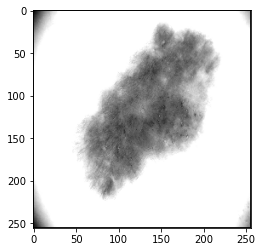

In [9]:
plt.imshow(img)
plt.show()

In [10]:
image_to_test = img_to_array(img)
image_to_test = image_to_test/255.0

In [11]:
image = np.expand_dims(image_to_test, axis=0)

### model prediction

In [12]:
results = model.predict(image)

1/1 [==============================] - 3s 3s/step


In [13]:
print(results)

[[1.8101167e-04 9.9981886e-01 2.0473873e-07 5.7133480e-08]]


In [14]:
single_result=results[0]
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]  

### predicted class

In [15]:
most_likely_class_index

1

In [16]:
class_label = class_names[most_likely_class_index]

### final result

In [17]:
print("Predicted class is  {} - Confidence Score: {:.2f}%".format(class_label, class_likelihood*100.0))

Predicted class is  benign - Confidence Score: 99.98%


## Thank You